In [618]:
### READ THE README.md FILE
# Load Pandas into Python
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

plt.style.use('fivethirtyeight')


In [619]:
#Create an iPython notebook and load the csv into pandas.
titanic = pd.read_csv('train.csv')

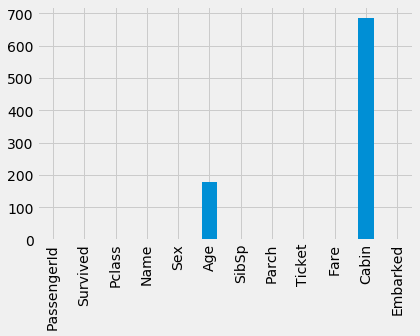

In [620]:
#Create an iPython notebook and load the csv into pandas.

titanic.isnull().sum().plot(kind = 'bar');


In [621]:
#Which column has the most `NaN` values? How many cells in that column are empty?

titanic['Cabin'].isnull().sum()

687

In [622]:
#Delete all rows where `Embarked` is empty

titanic[titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [623]:
titanic.dropna(subset=['Embarked'], inplace=True, axis=0)
titanic[titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [624]:
#Fill all empty cabins with **¯\\_(ツ)_/¯**
titanic['Cabin'].fillna("¯\\_(ツ)_/¯", inplace=True)


In [625]:
#There are two columns that pertain to how many family members are on the boat for a given person.
#Create a new column called `FamilyCount` which will be the sum of those two columns.

titanic['FamilyCount'] = titanic['SibSp'] + titanic['Parch']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0


In [626]:
#Reverends have a special title in their name.
#Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.

titanic['IsReverend']= titanic['Name'].str.contains('Rev.', na='1')
titanic['IsReverend']=titanic['IsReverend'].astype(int)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0,0


In [627]:
#In order to feed our training data into a classification algorithm,
#we need to convert our categories into 1's and 0's using `pd.get_dummies`
#Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. 
#These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column

titanic = pd.get_dummies(titanic, columns=['Embarked'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,0,0,0,0,1


In [628]:
#Do the same thing for `Sex`
titanic = pd.get_dummies(titanic, columns=['Sex'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,0,0,0,0,1,0,1


In [629]:
#What was the survival rate overall?
total_Survived=titanic['Survived'].sum()
survival_rate = (total_Survived / (len(titanic['Survived'])))*100
survival_rate

38.24521934758155

In [630]:
#Which gender fared the worst? What was their survival rate?

Surv_male =len(titanic[(titanic.Sex_male == 1) & (titanic.Survived == 1)])
Surv_female =len(titanic[(titanic.Sex_female == 1) & (titanic.Survived == 1)])
Surv_male_rate = (Surv_male / len(titanic[(titanic.Sex_male == 1)]) ) *100
Surv_female_rate =(Surv_female/ len(titanic[(titanic.Sex_female == 1)]) ) *100
print('Total male survivors: ' + str(Surv_male))
print('Male survival rate: ' + str(Surv_male_rate))

print('Total female survivors: ' + str(Surv_female))
print('Female survival rate: ' + str(Surv_female_rate))

Total male survivors: 109
Male survival rate: 18.890814558058924
Total female survivors: 231
Female survival rate: 74.03846153846155


In [631]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,0,0,0,0,1,0,1


In [632]:
#What was the survival rate for each `Pclass`?


p_3 = len(titanic[(titanic.Pclass == 3) & (titanic.Survived == 1)])
p_2 = len(titanic[(titanic.Pclass == 2) & (titanic.Survived == 1)])
p_1 = len(titanic[(titanic.Pclass == 1) & (titanic.Survived == 1)])

rate_p_3= (p_3 / titanic['Survived'].sum()) *100
rate_p_2= (p_2 / titanic['Survived'].sum()) *100
rate_p_1= (p_1 / titanic['Survived'].sum()) *100

print('PClass 3 survival rate: ' + str(rate_p_3))
print('PClass 2 survival rate: ' + str(rate_p_2))
print('PClass 1 survival rate: ' + str(rate_p_1))

PClass 3 survival rate: 35.0
PClass 2 survival rate: 25.588235294117645
PClass 1 survival rate: 39.411764705882355


In [633]:
#What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

cabins_face = len(titanic[(titanic.Cabin == "¯\\_(ツ)_/¯") & (titanic.Survived == 1)])
rate_cabins_face = (cabins_face / len(titanic[(titanic.Cabin == "¯\\_(ツ)_/¯") ])) *100

print('The survival rate for cabins marked **¯\\_(ツ)_/¯**: ' + str(rate_cabins_face))

The survival rate for cabins marked **¯\_(ツ)_/¯**: 29.985443959243085


In [634]:
# What is the survival rate for people whose `Age` is empty?
emp_age = len(titanic[(titanic.Age.isnull()) & (titanic.Survived == 1)])
emp_age_rate =(emp_age /titanic['Survived'].sum() *100)

print('The survival rate for people whose Age is empty: ' + str(emp_age_rate))


The survival rate for people whose Age is empty: 15.294117647058824


In [635]:
#What is the survival rate for each port of embarkation?

#Embarked_C
surv_embarkedC =len(titanic[(titanic.Embarked_C == 1) & (titanic.Survived == 1)])
surv_embarkedC_rate = (surv_embarkedC / titanic['Survived'].sum() ) *100
#Embarked_Q
surv_embarkedQ =len(titanic[(titanic.Embarked_Q == 1) & (titanic.Survived == 1)])
surv_embarkedQ_rate = (surv_embarkedQ / titanic['Survived'].sum() ) *100
#Embarked_S
surv_embarkedS =len(titanic[(titanic.Embarked_S == 1) & (titanic.Survived == 1)])
surv_embarkedS_rate = (surv_embarkedS / titanic['Survived'].sum() ) *100

print('The survival rate for C embarkation: ' + str(surv_embarkedC_rate))
print('The survival rate for Q embarkation: ' + str(surv_embarkedQ_rate))
print('The survival rate for S embarkation: ' + str(surv_embarkedS_rate))

The survival rate for C embarkation: 27.35294117647059
The survival rate for Q embarkation: 8.823529411764707
The survival rate for S embarkation: 63.8235294117647


In [636]:
#What is the survival rate for children (under 12) in each `Pclass`?

child_p_3 = len(titanic[(titanic.Pclass == 3) & (titanic.Survived == 1) & (titanic.Age < 12)])
child_rate_p_3= (child_p_3 / titanic['Survived'].sum()) *100

child_p_2 = len(titanic[(titanic.Pclass == 2) & (titanic.Survived == 1) & (titanic.Age < 12)])
child_rate_p_2= (child_p_2 / titanic['Survived'].sum()) *100

child_p_1 = len(titanic[(titanic.Pclass == 1) & (titanic.Survived == 1) & (titanic.Age < 12)])
child_rate_p_1= (child_p_1 / titanic['Survived'].sum()) *100

print('the survival rate for children (under 12) in Pclass 3: ' + str(child_rate_p_3))
print('the survival rate for children (under 12) in Pclass 2: ' + str(child_rate_p_2))
print('the survival rate for children (under 12) in Pclass 1: ' + str(child_rate_p_1))

the survival rate for children (under 12) in Pclass 3: 5.588235294117648
the survival rate for children (under 12) in Pclass 2: 5.0
the survival rate for children (under 12) in Pclass 1: 0.8823529411764706


In [637]:
#Did the captain of the ship survive? Is he on the list?

"""After searching through Google, I have found that the captain's name is Edward John Smith"""

onlist=titanic['Name'].str.contains('Smith', na='1')
titanic[onlist] 

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
174,175,0,1,"Smith, Mr. James Clinch",56.0,0,0,17764,30.6958,A7,0,0,1,0,0,0,1
260,261,0,3,"Smith, Mr. Thomas",NaN,0,0,384461,7.7500,¯\_(ツ)_/¯,0,0,0,1,0,0,1
284,285,0,1,"Smith, Mr. Richard William",NaN,0,0,113056,26.0000,A19,0,0,0,0,1,0,1
346,347,1,2,"Smith, Miss. Marion Elsie",40.0,0,0,31418,13.0000,¯\_(ツ)_/¯,0,0,0,0,1,1,0


In [638]:
#Did the captain of the ship survive? Is he on the list?
" The captain of the ship is not on the list"

' The captain of the ship is not on the list'

In [639]:
#Of all the people that died, who had the most expensive ticket? How much did it cost?

not_Survived=titanic[(titanic.Survived == 0)]
not_Survived.sort_values('Fare', ascending=False).head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
27,28,0,1,"Fortune, Mr. Charles Alexander",19.0,3,2,19950,263.0000,C23 C25 C27,5,0,0,0,1,0,1
438,439,0,1,"Fortune, Mr. Mark",64.0,1,4,19950,263.0000,C23 C25 C27,5,0,0,0,1,0,1
118,119,0,1,"Baxter, Mr. Quigg Edmond",24.0,0,1,PC 17558,247.5208,B58 B60,1,0,1,0,0,0,1
557,558,0,1,"Robbins, Mr. Victor",NaN,0,0,PC 17757,227.5250,¯\_(ツ)_/¯,0,0,1,0,0,0,1
527,528,0,1,"Farthing, Mr. John",NaN,0,0,PC 17483,221.7792,C95,0,0,0,0,1,0,1


In [640]:
#Of all the people that died, who had the most expensive ticket? How much did it cost?
"Both Mr. Charles Alexander Fortune and Mr. Mark Fortune paid the most expensive ticket out of all the people that died. The ticket price was 263.0000"


'Both Mr. Charles Alexander Fortune and Mr. Mark Fortune paid the most expensive ticket out of all the people that died. The ticket price was 263.0000'

In [641]:
#Does having family on the boat help or hurt your chances of survival?
surv_fam = len(titanic[(titanic.FamilyCount >0) & (titanic.Survived == 1)])
surv_fam_rate = (surv_fam / titanic['Survived'].sum()) *100


surv_notFam = len(titanic[(titanic.FamilyCount <= 0) & (titanic.Survived == 1)])
surv_notFam_rate = (surv_notFam / titanic['Survived'].sum()) *100


print('The survival rate for people who have family on the boat: ' + str(surv_fam_rate))
print('The survival rate for people who have not family on the boat: ' + str(surv_notFam_rate))

The survival rate for people who have family on the boat: 52.64705882352941
The survival rate for people who have not family on the boat: 47.35294117647059


In [642]:
#Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people.
#It's fine if a handful of charts are basic (Gender, Age, etc), but what 
#we're really looking for is something beneath the surface.


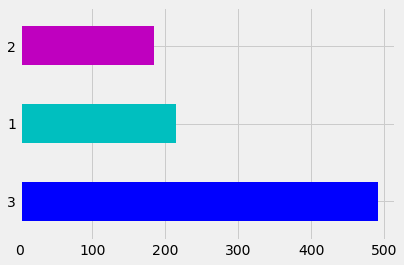

In [643]:

titanic.Pclass.value_counts().plot(kind='barh',color=['b','c','m']);

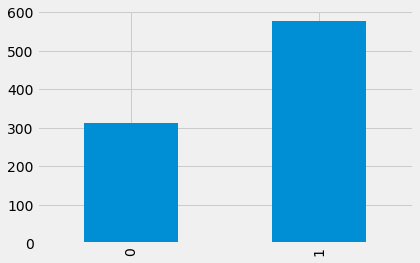

In [644]:
titanic.Sex_male.value_counts().sort_index().plot(kind='bar')

In [645]:
stats.skew(titanic['Fare']) #

4.793334993307843

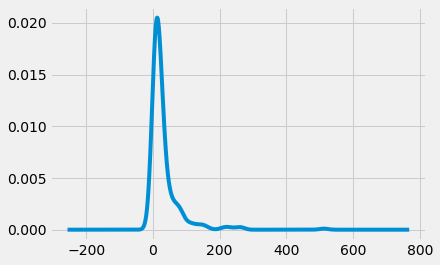

In [646]:
titanic['Fare'].plot.kde();
plt.ylabel('')
plt.show()

In [647]:
stats.skew(titanic['Fare']) #positive skew


4.793334993307843

PassengerId    0.033681
Survived      -0.082446
Pclass        -0.365902
Age            1.000000
SibSp         -0.307351
Parch         -0.187896
Fare           0.093143
FamilyCount   -0.300699
IsReverend     0.086089
Embarked_C     0.038268
Embarked_Q    -0.021693
Embarked_S    -0.025431
Sex_female    -0.099037
Sex_male       0.099037
Name: Age, dtype: float64


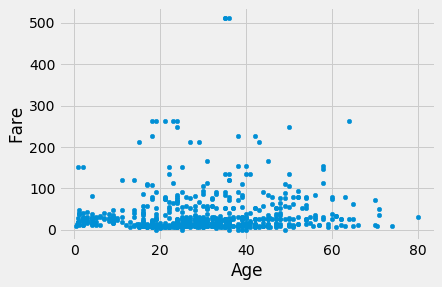

In [648]:
# Are soda servings and coffee servings correlated?
#drinks.plot(kind='scatter', x='soda_servings', y='coffee_servings')
titanic.plot(kind='scatter', x='Age',y='Fare')
print((titanic.corr()['Age']))  # Correlation coefficients

In [649]:
titanic.describe().T.style

,count,mean,std,min,25%,50%,75%,max
PassengerId,889,446,256.998,1,224,446,668,891
Survived,889,0.382452,0.48626,0,0,0,1,1
Pclass,889,2.31159,0.8347,1,2,3,3,3
Age,712,29.6421,14.4929,0.42,20,28,38,80
SibSp,889,0.524184,1.1037,0,0,0,1,8
Parch,889,0.382452,0.806761,0,0,0,0,6
Fare,889,32.0967,49.6975,0,7.8958,14.4542,31,512.329
FamilyCount,889,0.906637,1.6147,0,0,0,1,10
IsReverend,889,0.00674916,0.0819216,0,0,0,0,1
Embarked_C,889,0.188976,0.39171,0,0,0,0,1


In [650]:
titanic.groupby('Pclass')[['Survived']].mean().T.style

Pclass,1,2,3
Survived,0.626168,0.472826,0.242363


In [651]:
titanic.kurt()

PassengerId     -1.197156
Survived        -1.769179
Pclass          -1.269437
Age              0.187949
SibSp           17.838972
Parch            9.750592
Fare            33.508477
FamilyCount      9.135664
IsReverend     143.988765
Embarked_C       0.534419
Embarked_Q       6.684560
Embarked_S      -0.989810
Sex_female      -1.612225
Sex_male        -1.612225
dtype: float64

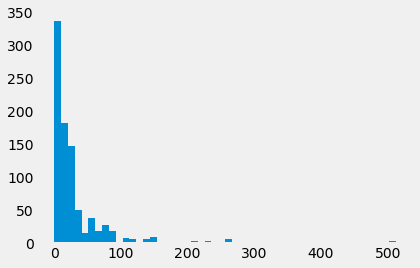

In [652]:
titanic['Fare'].hist(bins =50, grid=False);

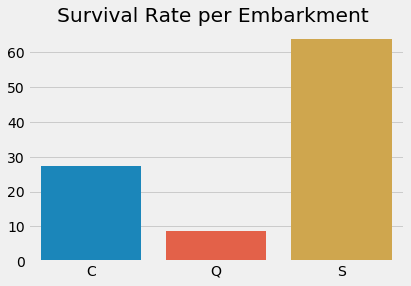

In [653]:
x = ['C','Q','S']
y = [surv_embarkedC_rate,surv_embarkedQ_rate,surv_embarkedS_rate]

sns.barplot(x,y)
plt.title('Survival Rate per Embarkment ');

In [654]:
titanic.std()

PassengerId    256.998173
Survived         0.486260
Pclass           0.834700
Age             14.492933
SibSp            1.103705
Parch            0.806761
Fare            49.697504
FamilyCount      1.614703
IsReverend       0.081922
Embarked_C       0.391710
Embarked_Q       0.281427
Embarked_S       0.447063
Sex_female       0.477538
Sex_male         0.477538
dtype: float64

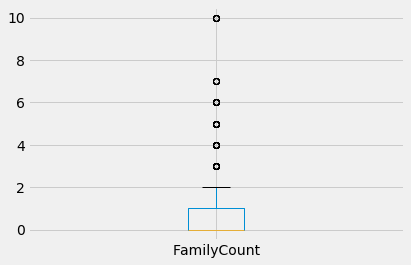

In [655]:

titanic.boxplot(column='FamilyCount');


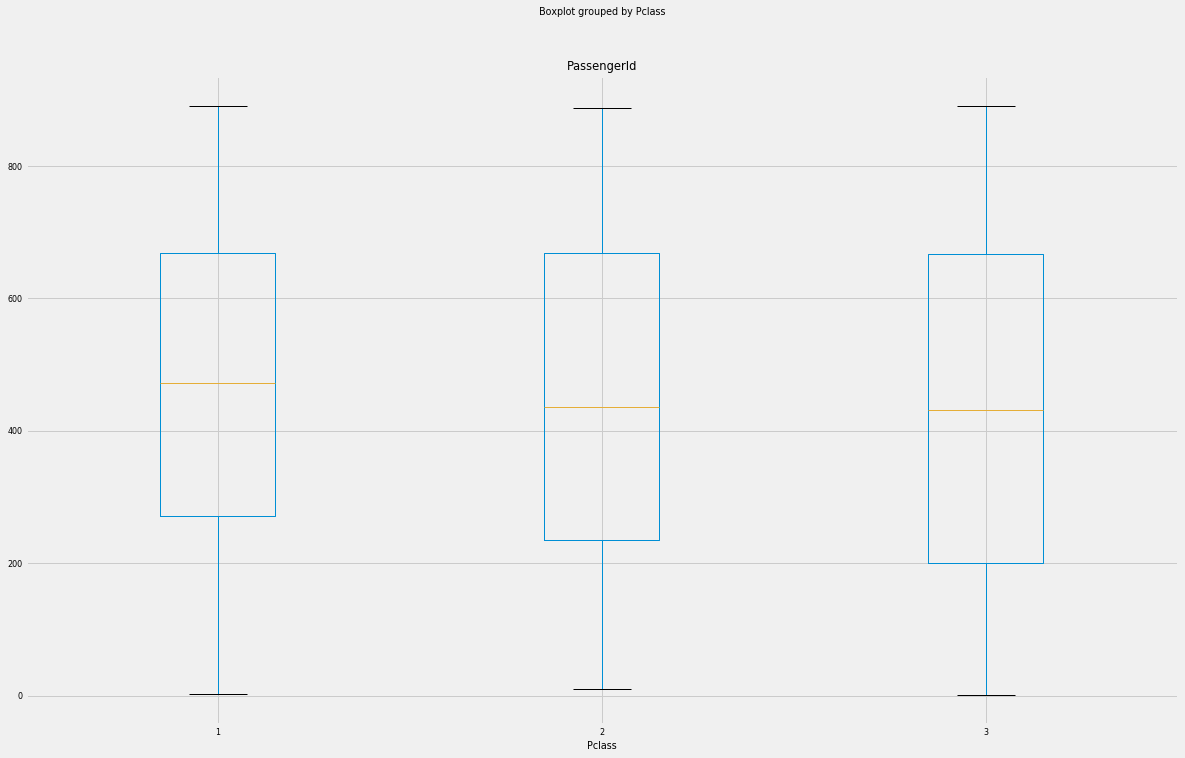

In [656]:
plt.rcParams['figure.figsize'] = (20, 12)
plt.rcParams['font.size'] = 8
titanic.boxplot(column='PassengerId',by='Pclass');
